In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Geração dos dados ####

$ f(x) = x^T w $

$ y = f(x) + \epsilon $

$ \epsilon = \mathcal{N}(0, \sigma_n^2) $

In [153]:
N = 100
complexity = 3
sigma = 0.4

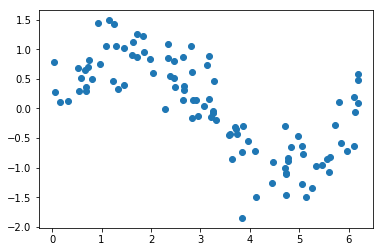

In [154]:
x = np.sort(2*np.pi*np.random.random_sample((N,)))
e = sigma * np.random.randn(N)
y = np.sin(x)
y_e = y+e
plt.plot(x,y_e, 'o')
plt.show()

### Likelihood ###
$p(\mathbf{y}|X,w) = \prod_{i=1}^{n}{p(y_i | x_i,w)} = \prod_{i=1}^{n}{\frac{1}{\sqrt{2\pi}\sigma_n}e^{\frac{-(y_i-x_i^T w)^2}{2\sigma_n^2}}} = \frac{1}{(2\pi\sigma_n^2)^{n/2}}e^{\frac{-1}{2\sigma_n^2}|\mathbf{y} - X^Tw|^2} = \mathcal{N}(X^Tw, \sigma_n^2I)$
#### Fitando um polinômio utiizando o método dos mínimos quadrados ($ X^Tw $ )####

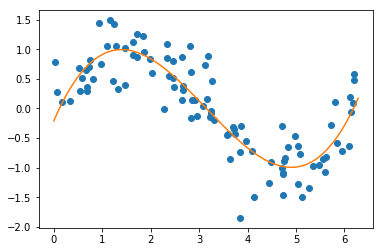

Erro de 0.37 (desvio padrão)


In [155]:
xp = np.linspace(0, 2*np.pi, 1000)
w = np.polyfit(x, y, complexity)
p = np.poly1d(w)
plt.plot(x,y_e, 'o')
plt.plot(xp,p(xp))
plt.show()
    
error_array = (p(x) - y_e)**2
error = np.sum(error_array)
    
print("Erro de %.2f (desvio padrão)" % np.sqrt(np.asarray(error)/N))

#### Calculando $p(\mathbf{y}|X,w) = \mathcal{N}(X^Tw, \sigma_n^2I)$ ####

In [156]:
def normal_multivariate(mu, sigma, dados):
    return (np.linalg.det(2*np.pi*sigma)**(-1/2))*np.exp(-1/2 * np.dot(np.dot((dados-mu), np.linalg.inv(sigma)), (dados-mu).T))

def get_x_matrix(x, complexity):
    value_x = x.copy()
    for i in range(complexity+1):
        if not i:
            value_x = np.power(x,i)
        else:
            value_x = np.concatenate((value_x, np.power(x, i)))
    value_x = value_x.reshape((complexity+1,x.shape[0])).T
    return value_x

In [157]:
x = get_x_matrix(x,complexity)
covariance = sigma * np.eye(complexity+1)
covariance
#normal_multivariate()

array([[ 0.4,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0. ,  0. ],
       [ 0. ,  0. ,  0.4,  0. ],
       [ 0. ,  0. ,  0. ,  0.4]])

In [47]:
w

array([ 0.09086106, -0.85909962,  1.86371823, -0.18798618])

#### Calculando $\beta$ ####
$\beta$ é o inverso da variância do erro encontrado utilizando os parâmetros w calculados pelo método dos mínimos quadrados

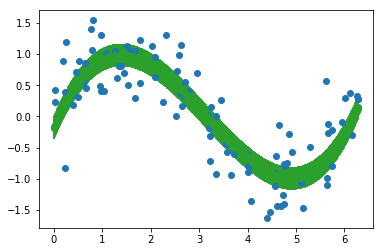

Variância de 0.18 ((desvio padrão)**2) e beta de 5.50 (1/variancia)


In [36]:
variance = error/N
beta = 1/variance

plt.plot(x,y_e, 'o')
plt.plot(xp,p(xp))
plt.errorbar(xp, p(xp), yerr=variance, fmt='o')
plt.show()

print("Variância de %.2f ((desvio padrão)**2) e beta de %.2f (1/variancia)" % (variance, beta))